# keyu chen
# km5ar

# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

The above chart is a "chartjunk", which refer to "all visual elements in charts and graphs that are not necessary to comprehend the information represented on the graph, or that distract the viewrs from this information ".

Here is why: 
1) the graph failed to achieve "comparisons, contrasts, differences" in the data." and the barplot failed "compares one category of a feature to another on same dimension"

The bar "NOT VERY" with 25% is higher than bar "SOMEWHAT" with 28%.
The Bar "NOT AT ALL" with 13% is higher than all those bar which has higher percentage than 13%.

2) the above graph did not "integrate words, numbers and images"
 the percentage of the graph doesn't match the size of the bar





### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

this 3D pie charts violate the principle of proportional ink, this is a oval, which skewed the porpotion of the each picece, it expands the angles on the top and bottom and compresses the angles on the sides. It should never be used.

inaddition to that the above graph did not "integrate words, numbers and images", becasue the title is "Birth Rates by SECTOR" and the details porportion is about different industry, which just doesn't make sense. Why birth rate has to do with differenct sector or indsutry? graphics should be presented along with documentation to help the audience understand the meaning of various aesthetic elements. 

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

the above graph did not "integrate words, numbers and images" correctly, that is the y axis is from 1000 to 0, which is reverse of our common logic, the peak point in 1995 show on the graph has the least cases instead of max, which is extremely misleading.

It gives average people a impression that after "2005 Florida enacted its 'Stand Your Ground' law" the number of murders committed using firearms is decreasing, however the fact is the opppsite, after "2005 Florida enacted its 'Stand Your Ground' law" the number of murders committed using firearms is increasing from 2005's 500 to 721 in 2013.

If we can correct the y axis by reverse it to starts from 0 to 1000, then this will be a much better graph.


## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [4]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')
gss_clean['relationship']= gss_clean['relationship'].cat.reorder_categories(['strongly agree', 'agree','disagree', 'strongly disagree'])
mybars = gss_clean.relationship.value_counts().sort_index()
mybars

strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: relationship, dtype: int64

Text(0.5, 1.0, 'Can a working mother establish a strong relationship with children?')

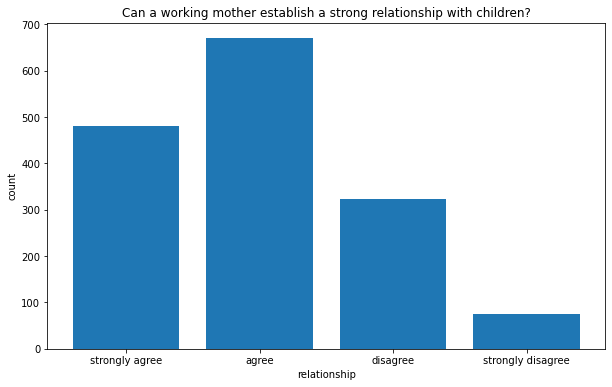

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(mybars.index, mybars.values)
plt.ylabel('count')
plt.xlabel('relationship')
plt.title('Can a working mother establish a strong relationship with children?')

Text(0.5, 1.0, 'Can a working mother establish a strong relationship with children?')

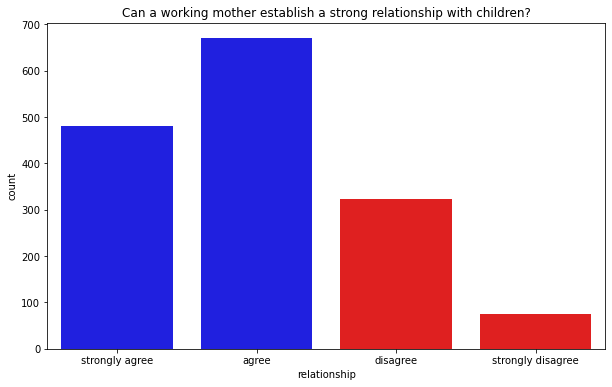

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mybars.index, y=mybars.values, palette = ['blue', 'blue', 'red', 'red'])
plt.ylabel('count')
plt.xlabel('relationship')
plt.title('Can a working mother establish a strong relationship with children?')

Text(0.5, 1.0, 'Can a working mother establish a strong relationship with children?')

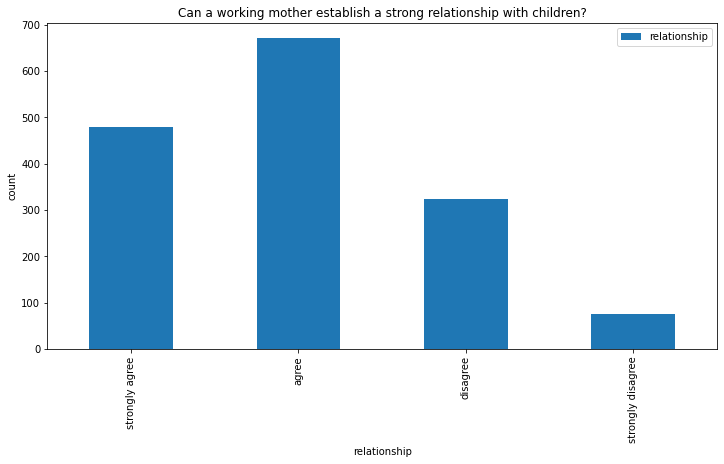

In [14]:
mybars_df = mybars.reset_index()
mybars_df.plot(kind = 'bar', x = 'index', y = 'relationship', figsize = [12,6])
plt.ylabel('count')
plt.xlabel('relationship')
plt.title('Can a working mother establish a strong relationship with children?')

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [13]:
gss_plot = gss_clean.groupby(['sex', 'relationship']).size()
gss_plot = gss_plot.reset_index()
gss_plot = gss_plot.rename({0:'count'}, axis=1)
gss_plot

,sex,relationship,count
0,female,strongly agree,337
1,female,agree,344
2,female,disagree,146
3,female,strongly disagree,39
4,male,strongly agree,143
5,male,agree,326
6,male,disagree,178
7,male,strongly disagree,37


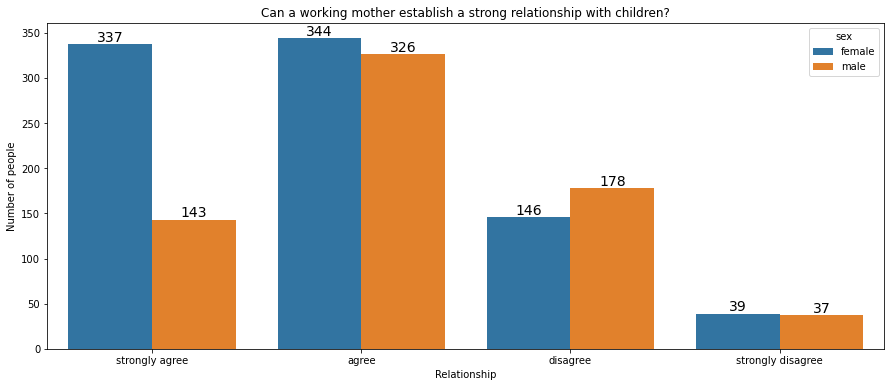

In [19]:
plt.figure(figsize=(15, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=gss_plot)
plt.title('Can a working mother establish a strong relationship with children?')
plt.xlabel('Relationship')
plt.ylabel('Number of people')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

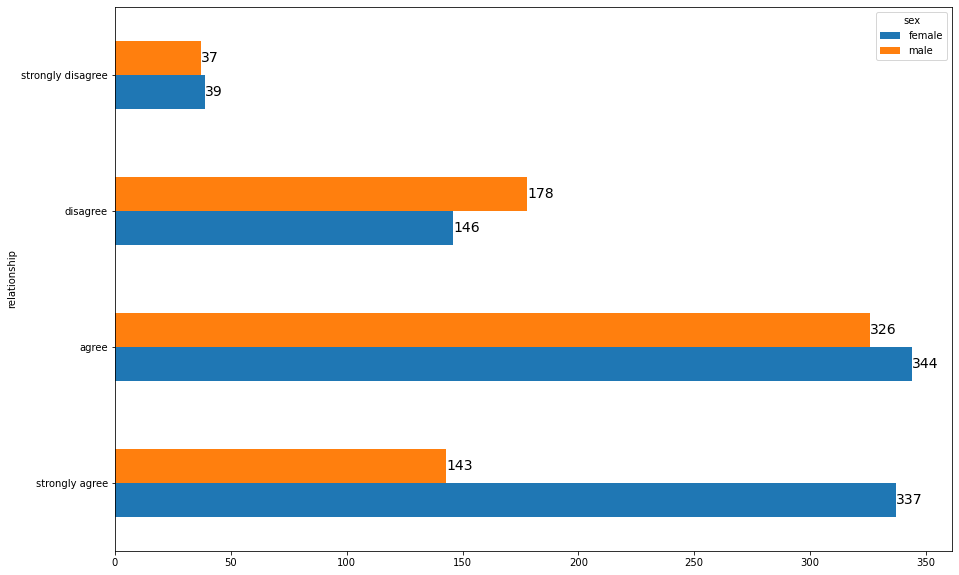

In [17]:
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)
myplot = xtab.plot(kind='barh', figsize = [15,10])
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

Text(0.5, 0.98, 'Can a working mother establish a strong relationship with children?')

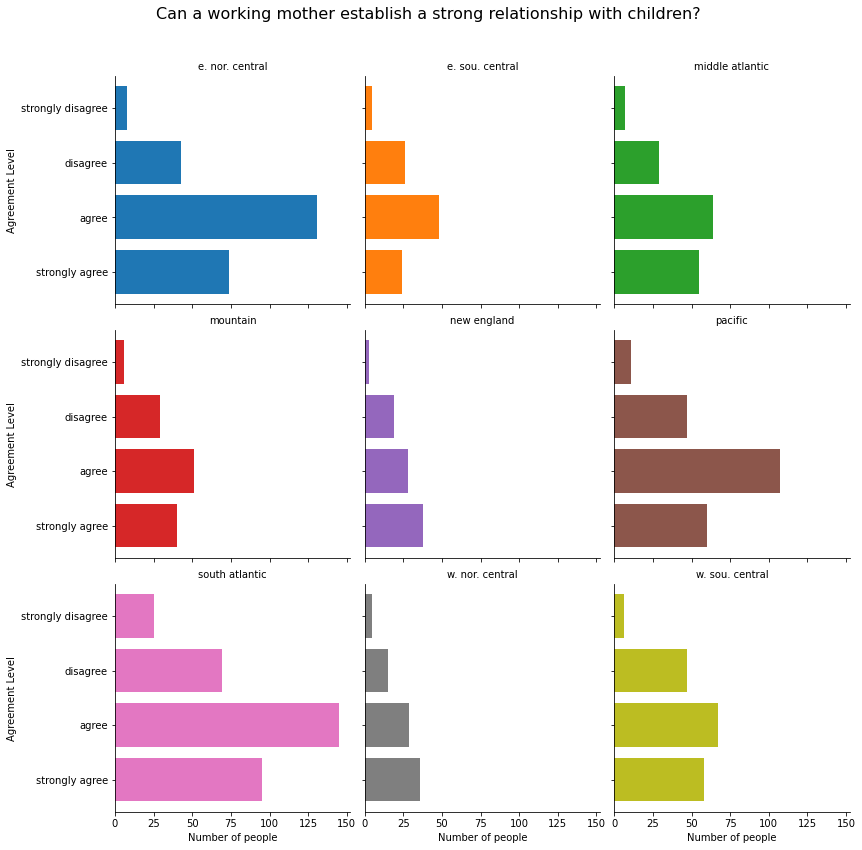

In [16]:
gss_plot = gss_clean.groupby(['region', 'relationship']).size().reset_index()
gss_plot = gss_plot.rename({0:'count'}, axis=1)

g = sns.FacetGrid(gss_plot, col = 'region', hue = 'region',col_wrap=3,
                 height=4, aspect=1)
g.map(plt.barh, 'relationship', 'count')
g.fig.suptitle('Can a working mother establish a strong relationship with children?', fontsize=16)
g.set_axis_labels('Number of people', 'Agreement Level') 
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=.8)

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [18]:
gss_plot2 = gss_clean.groupby('education').agg({'job_prestige':'mean', 'socioeconomic_index':'mean'}).reset_index()
gss_plot2 = gss_plot2.query('education>=8')

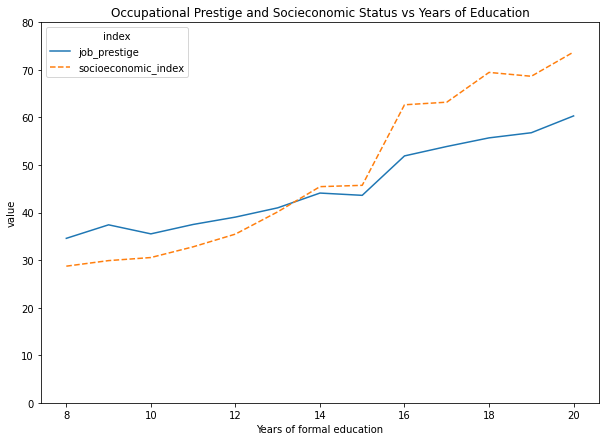

In [19]:
plt.figure(figsize=(10,7))
plt.plot(gss_plot2['education'],gss_plot2['job_prestige'],label = 'job_prestige')
plt.plot(gss_plot2['education'],gss_plot2['socioeconomic_index'],label = 'socioeconomic_index', linestyle = 'dashed')
plt.xlabel('Years of formal education')
plt.ylabel('value')
plt.ylim(0, 80)
plt.title('Occupational Prestige and Socieconomic Status vs Years of Education')
plt.legend(title = 'index')
plt.show()

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

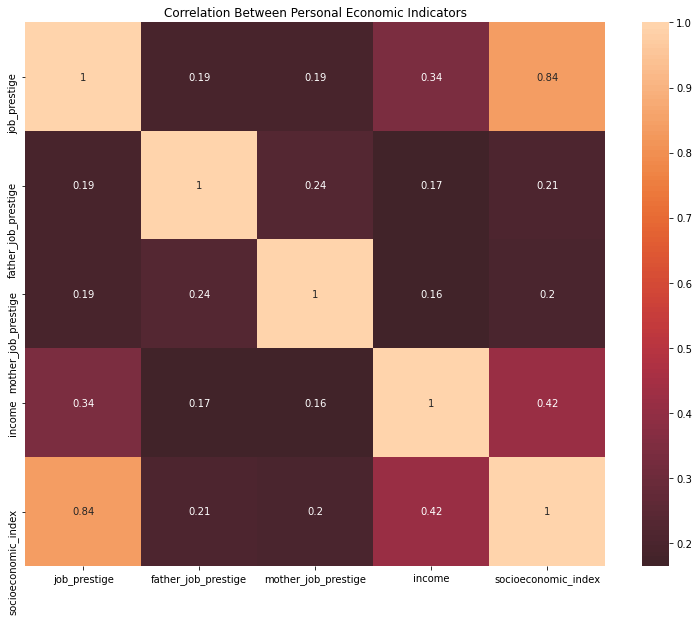

In [22]:
var = ['job_prestige', 'father_job_prestige','mother_job_prestige', 'income', 'socioeconomic_index']
corr = gss_clean[var].corr()
corr
plt.figure(figsize = (13,10))
sns.heatmap(corr, annot=True, center = 0)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

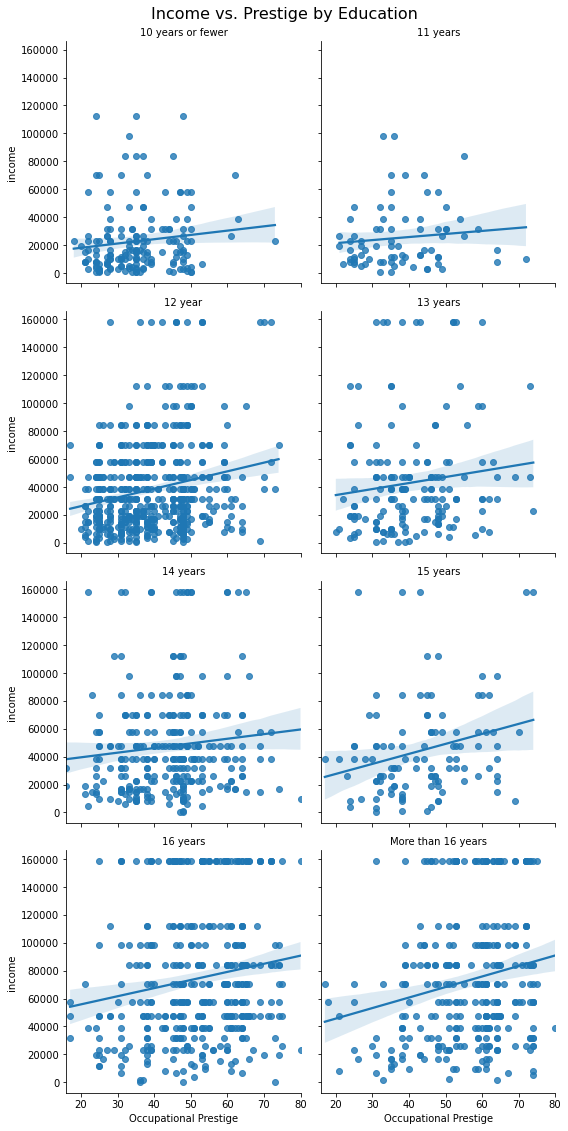

In [23]:
gss_plot = gss_clean
gss_plot['education_cuts'] = pd.cut(gss_clean.education, 
       bins = [-.1, 10,11,12,13,14,15,16, 100],
       labels=['10 years or fewer','11 years', '12 year', 
               '13 years', '14 years', '15 years', '16 years'
               ,'More than 16 years'])
g = sns.FacetGrid(gss_plot,
                  col = 'education_cuts', 
                  col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
g.set_xlabels('occupational prestige')

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

<AxesSubplot:xlabel='job_prestige', ylabel='income'>

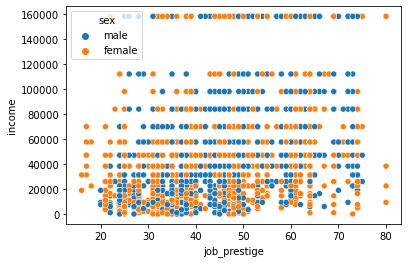

In [25]:
gss_gender = gss_clean[['sex','income','job_prestige']]

sns.scatterplot(x = 'job_prestige', y = 'income', hue = 'sex', data = gss_clean)

Text(0.5, 1.0, 'Distributions of Income by sex')

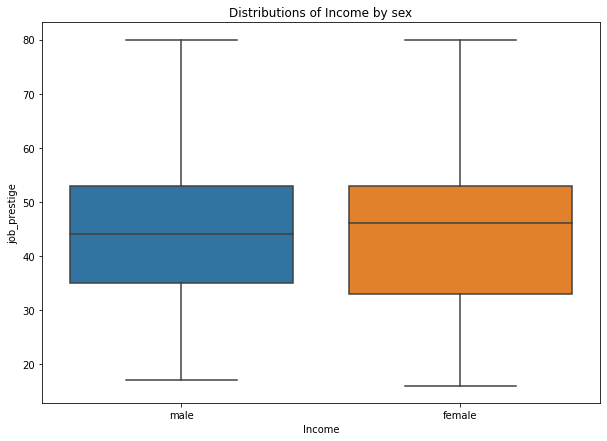

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'sex', y = 'job_prestige', data = gss_clean)
plt.xlabel("Income")
plt.title("distributions of income by sex")

Text(0.5, 1.0, 'Distributions of Income by sex')

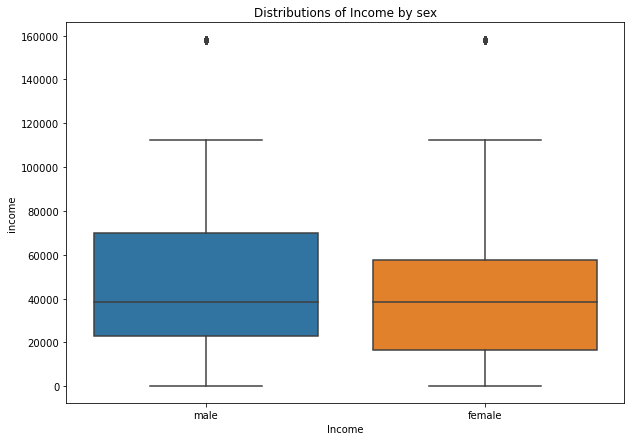

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'sex', y = 'income', data = gss_clean)
plt.xlabel("Income")
plt.title("distributions of income by sex")

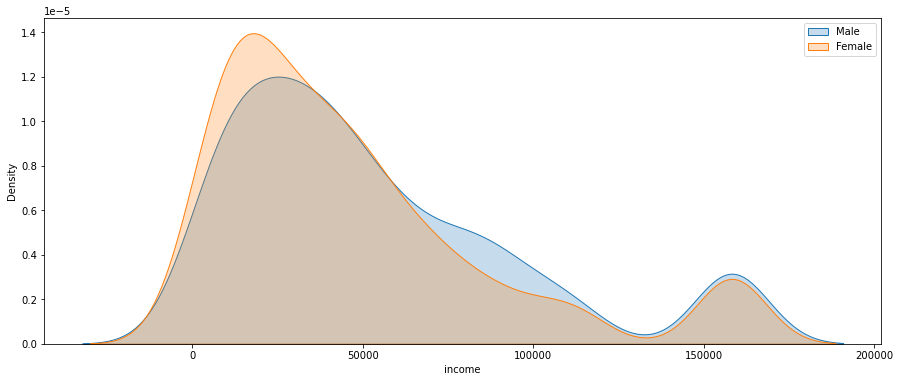

In [34]:
plt.figure(figsize = (15,6))      # reference: from professor Jon's office hours
sns.kdeplot(gss_clean[gss_clean['sex'] == 'male'].income, shade = True, label = 'Male')
sns.kdeplot(gss_clean[gss_clean['sex'] == 'female'].income, shade = True, label = 'Female')
plt.legend()

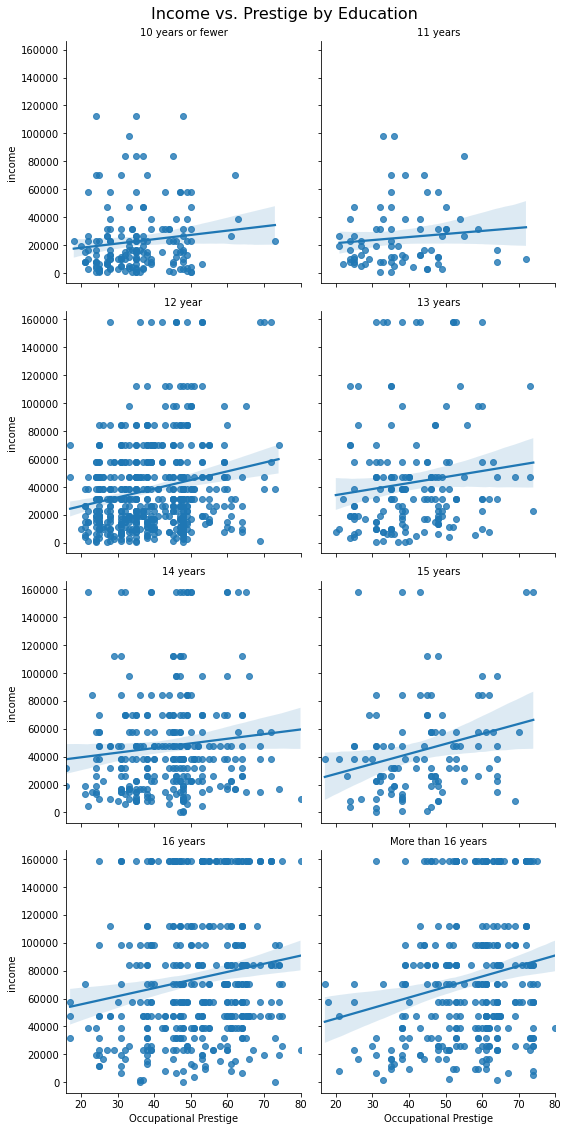

In [28]:
gss_plot = gss_clean
gss_plot['prestige_cuts'] = pd.cut(gss_clean.job_prestige, 
       bins = [-.1, 10,11,12,13,14,15,16, 100],
       labels=['10 years or fewer','11 years', '12 year', 
               '13 years', '14 years', '15 years', '16 years'
               ,'More than 16 years'])
g = sns.FacetGrid(gss_plot,
                  col = 'education_cuts', 
                  col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
g.set_xlabels('Occupational Prestige')

(25.0, 60.0)

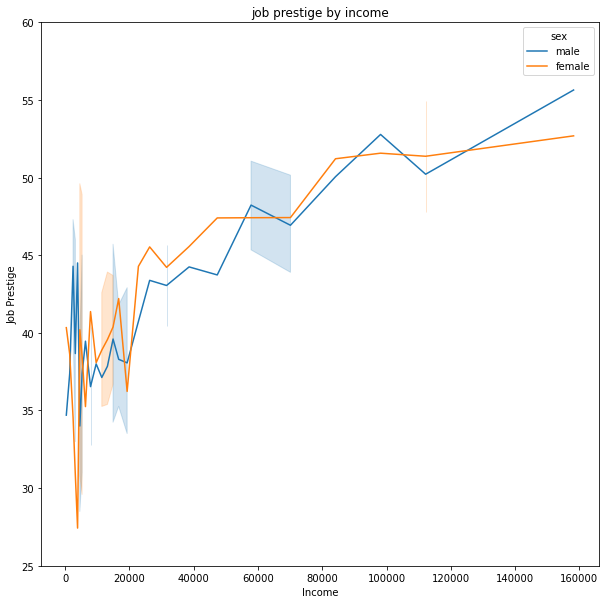

In [70]:
plt.figure(figsize=(10,10))
sns.lineplot(x='income', y='job_prestige', hue='sex',
             data=gss_clean.query("sex=='male' | sex=='female'"))
plt.xlabel('Income')
plt.ylabel('Job Prestige')
plt.title('job prestige by income')
plt.ylim(25,60)

1) Do men have higher incomes than women?



according to our plot, men does have slightly higher income than women

2) If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women

we can see that male and female have similar median income, however, the middle 50% of male income are higher than female, at the same time, the prestige of men and women's job is similar. 
in addition to that, we can also see that at the income range of 60000 above, there is more men than women. 

acoording to the above charts, we can conclude that men this income difference is not do to the fact that men have jobs with higher occupational prestige than women.
because we can see that women tend to need to have higher job prestige in order to earn same amount of money.